# ISW Naltural language processing unit
In these notebook we are vectorizing a ISW dataset


In [32]:
import pandas as pd 
import nltk


In [33]:

ISW = pd.read_csv('ISW.csv', dtype={"main_txt": "O"})
ISW

,date,title,full_url,main_html,main_html_v2,main_text
0,2022-02-25,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""><...",['Russian forces entered major Ukrainian citie...
1,2022-02-26,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""><...",['Russian forces’ main axes of advance in the ...
2,2022-02-27,Russia-Ukraine Warning Update: Russian Offensi...,https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p style=""text-align: left;""><strong><span st...","['February 27, 4pm EST', 'The Russian military..."
3,2022-02-28,"Russian Offensive Campaign Assessment, Februar...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""> ...","['February 28, 3:30pm EST', 'The Russian milit..."
4,2022-03-01,"Russian Offensive Campaign Assessment, March 1",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""> ...","['March 1, 3:00 pm EST', 'Russian forces are c..."
...,...,...,...,...,...,...
324,2023-01-21,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""> ...","['January 21, 7:45 pm ET', 'The Ukrainian defe..."
325,2023-01-22,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""><...","['Kateryna Stepanenko and Frederick W. Kagan',..."
326,2023-01-23,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""><...","['Karolina Hird, George Barros, Kateryna Stepa..."
327,2023-01-24,"Russian Offensive Campaign Assessment, January...",https://www.understandingwar.org/backgrounder/...,"<!DOCTYPE html>\n\n<html dir=""ltr"" lang=""en"" x...","[<p align=""center"" style=""text-align: left;""> ...","['January 24, 9:30 pm ET', 'A coalition of NAT..."


## Cretating a new dataset with pure text and indexing by date

In [34]:
pure = ISW[['main_text', 'date']]
# pure.set_index('date', inplace=True)
pure

,main_text,date
0,['Russian forces entered major Ukrainian citie...,2022-02-25
1,['Russian forces’ main axes of advance in the ...,2022-02-26
2,"['February 27, 4pm EST', 'The Russian military...",2022-02-27
3,"['February 28, 3:30pm EST', 'The Russian milit...",2022-02-28
4,"['March 1, 3:00 pm EST', 'Russian forces are c...",2022-03-01
...,...,...
324,"['January 21, 7:45 pm ET', 'The Ukrainian defe...",2023-01-21
325,"['Kateryna Stepanenko and Frederick W. Kagan',...",2023-01-22
326,"['Karolina Hird, George Barros, Kateryna Stepa...",2023-01-23
327,"['January 24, 9:30 pm ET', 'A coalition of NAT...",2023-01-24


Lets create a summary for 1 text.

In [35]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
Lemm = WordNetLemmatizer()
import ast



# creatng a list of paragraphs 
text = pure["main_text"].iloc[17].lower()
text = ast.literal_eval(text)
text = [Lemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]

text


['mason clark, george barros, and kateryna stepanenko',
 'march 14, 5:00 pm et',
 'russian forces made small territorial gains in luhansk oblast on march 14 but did not conduct any major attacks toward kyiv or in northeastern ukraine.russian forces continue to assemble reinforcements and attempt to improve logistical support in both the kyiv and southern operational directions. ongoing russian efforts to replace combat losses with both russian replacements and non-russian sources, including syrian fighters and the wagner group, are unlikely to enable russia to resume major offensive operations within the coming week.',
 'key takeaways',
 'russia continues to face difficulties replacing combat losses and increasingly seeks to leverage irregular forces including russian pmcs and syrian fighters.the ukrainian general staff claimed that russian servicemen are increasingly refusing to travel to ukraine despite promises of veteran status and higher salaries.the ukrainian general staff report

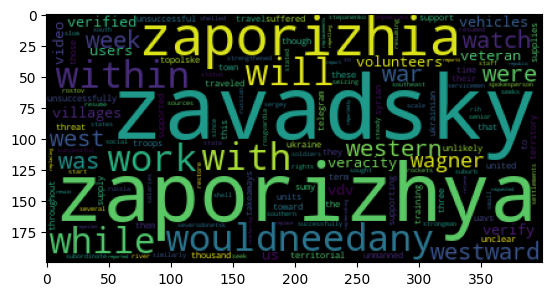

In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import wordcloud
import matplotlib.pyplot as plt

    
cv = CountVectorizer(max_features=None)
X_cv = cv.fit_transform(text).toarray()

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(text)

feature_names = tfidf.get_feature_names_out()
dense = X_tfidf.todense()
lst = dense.tolist()

df = pd.DataFrame(lst, columns=feature_names)
df.T.sum(axis=1)

x = tfidf.vocabulary_
cloud  = wordcloud.WordCloud().generate_from_frequencies(x)

plt.imshow(cloud)